In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [38]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [3]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [4]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe() # to get the statistical description of the dataset.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df.isnull().sum() # no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


we can see from above line that the distribution of class is heavily skewed.

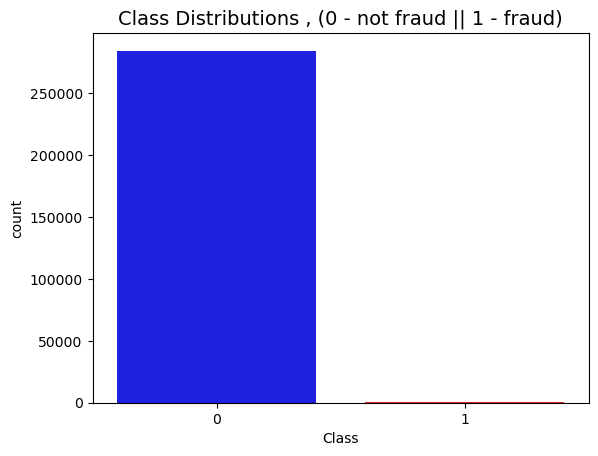

In [12]:
colors = ["blue", "red"]

sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('Class Distributions , (0 - not fraud || 1 - fraud)', fontsize=14)
plt.show() # heavily skewed

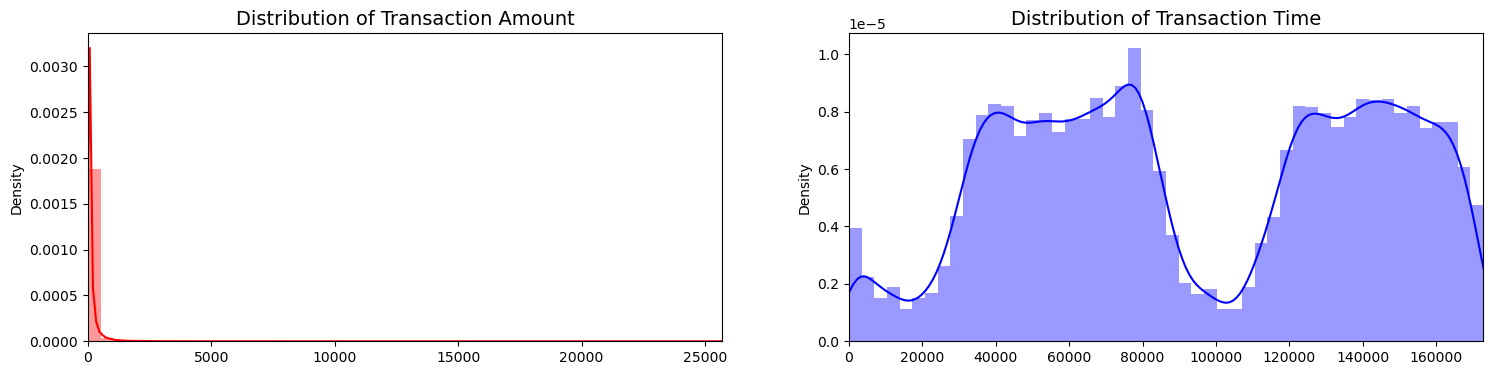

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4)) # here ax is an array of the 2 subplots in the figure.

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='red')  # sns.distplot --> for the distribution plot.
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])  # to set the x-axis limit.

sns.distplot(time_val, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

we also have to take a subsample which will contain 50/50 ratio of 'fraud' and 'not fraud' samples.

In [14]:
df.shape

(284807, 31)

all the features of the df are scaled except for the amount and time column.

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'],axis=1,inplace=True)

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount','scaled_time'],axis=1,inplace=True)
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

In [17]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


splitting the data : we will undersample or oversample the dataset but we will test the model on original test dataset.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds',round(df['Class'].value_counts()[0]/len(df)*100,2),'% of dataset') # these two lines are to calculate the percentage of fraud and non-fraud transactions.
print('Fraud',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of dataset')

x = df.drop('Class',axis=1)
y = df['Class'] #target variable.

ss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False) # this is a process of cross-validation(the dataset is divided into 5 folds).

for train_index,test_index in ss.split(x,y):
    print("train index",train_index,"test_index",test_index)
    original_xtrain,original_xtest = x.iloc[train_index],x.iloc[test_index]
    original_ytrain,original_ytest = y.iloc[train_index],y.iloc[test_index]
original_xtrain,original_xtest,original_ytrain,original_ytest = train_test_split(x,y,test_size=0.2,random_state=42)

original_xtest = original_xtest.values
original_xtrain = original_xtrain.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

No Frauds 99.83 % of dataset
Fraud 0.17 % of dataset
train index [ 30473  30496  31002 ... 284804 284805 284806] test_index [    0     1     2 ... 57017 57018 57019]
train index [     0      1      2 ... 284804 284805 284806] test_index [ 30473  30496  31002 ... 113964 113965 113966]
train index [     0      1      2 ... 284804 284805 284806] test_index [ 81609  82400  83053 ... 170946 170947 170948]
train index [     0      1      2 ... 284804 284805 284806] test_index [150654 150660 150661 ... 227866 227867 227868]
train index [     0      1      2 ... 227866 227867 227868] test_index [212516 212644 213092 ... 284804 284805 284806]


In [19]:
# now we have to see if both the train and test are similarly distributed
train_unique_label,train_counts_label = np.unique(original_ytrain,return_counts=True)
test_unique_label,test_counts_label = np.unique(original_ytest,return_counts=True)
print('-'*100)
print('Label Distributions\n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions

[0.99827075 0.00172925]
[0.99827955 0.00172045]


Random-Under Sampling - we will remove data from non-fraud class to make the ratio of fraud and non-fraud 50/50 and then reshuffle it to avoid overfitting.

In [20]:
df = df.sample(frac=1)
# amount of fraud classes = 492 rows
fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]
normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

# shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1,random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
193864,10.656047,0.747854,0.549151,-2.138064,-2.686702,1.976446,-0.140822,-1.018233,1.870080,-0.724699,...,1.311449,0.627319,0.280275,-0.769290,0.061492,0.327271,-0.467892,-0.171102,0.068702,0
144104,-0.293440,-0.188465,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,...,0.576379,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1
131064,-0.293440,-0.322647,-1.707840,-1.049853,2.535981,-1.591628,0.471683,-1.421931,-0.805661,0.378398,...,0.149539,0.196191,0.221847,-0.086522,0.510558,0.466826,-0.800343,0.051417,0.092015,0
12369,-0.293440,-1.540426,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,...,1.007703,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1
15451,1.089779,-1.431536,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,...,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,1


Equally distributing and correlating.

Distribution of the classes in the subsample dataset.
0    0.5
1    0.5
Name: Class, dtype: float64


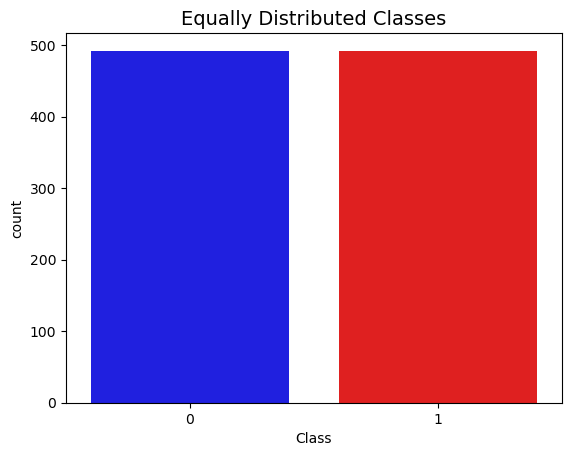

In [21]:
print('Distribution of the classes in the subsample dataset.')
print(new_df['Class'].value_counts()/len(new_df))
      
sns.countplot(x = 'Class',data=new_df,palette=colors)
plt.title('Equally Distributed Classes',fontsize=14)
plt.show()

Text(0.5, 1.0, 'Subsample correlation matrix \n')

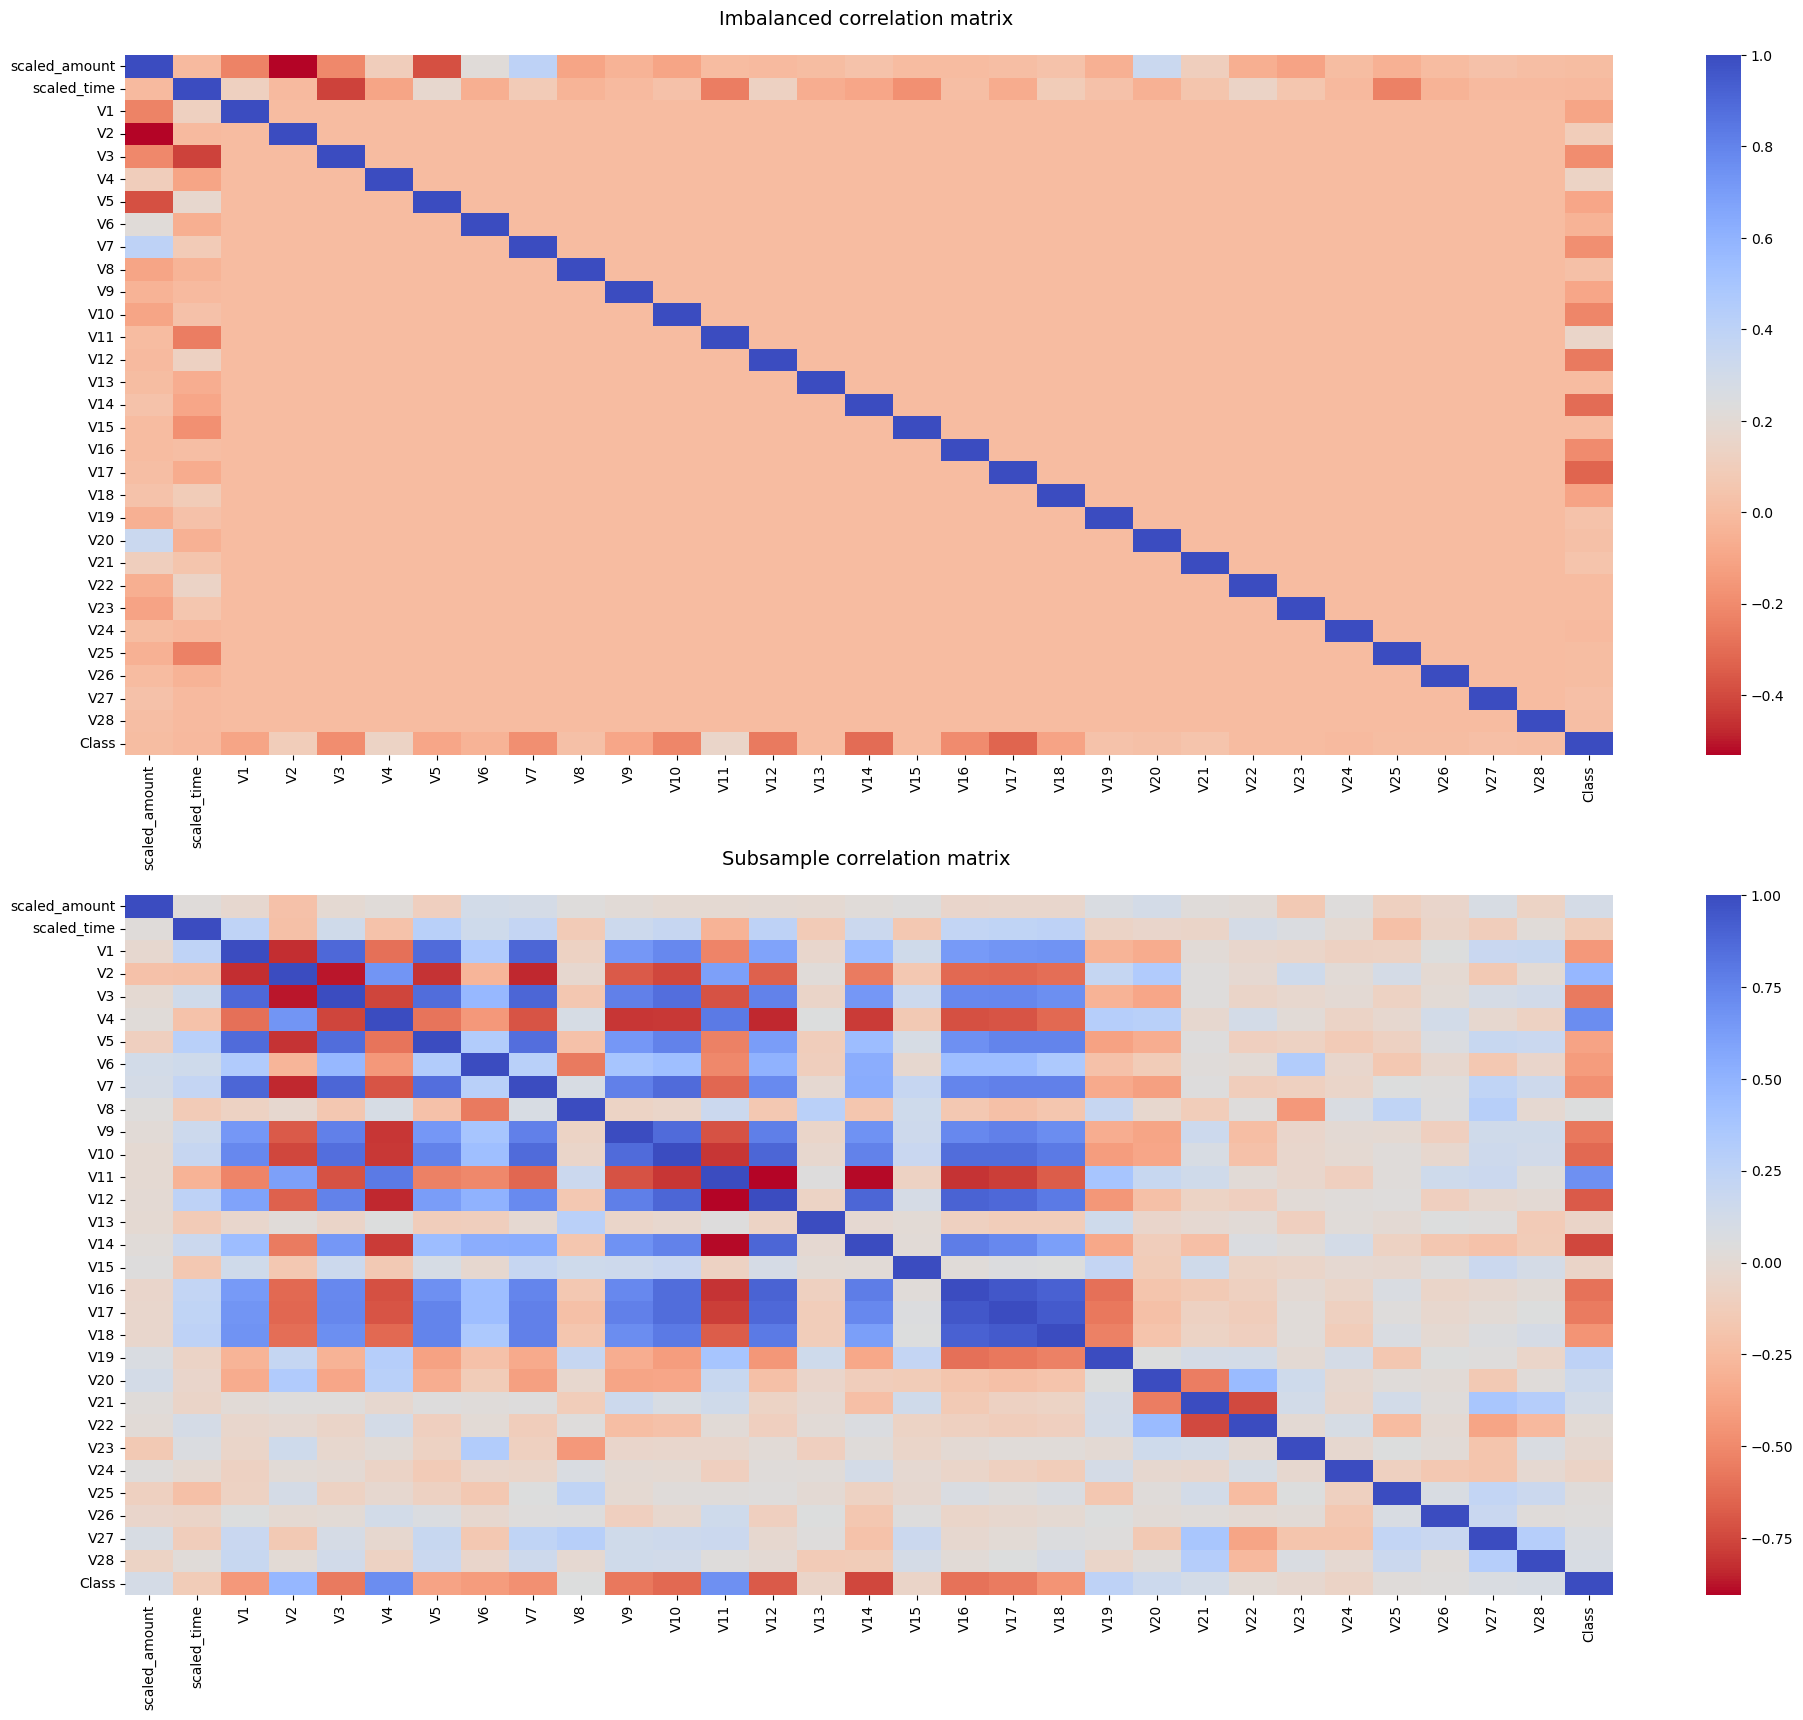

In [22]:
# correlation matrices.
f, (ax1,ax2) = plt.subplots(2,1,figsize=(24,20))

# entire dataframe
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax1)
ax1.set_title("Imbalanced correlation matrix \n",fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax2)
ax2.set_title("Subsample correlation matrix \n",fontsize=14)

Boxplots

Text(0.5, 1.0, 'v10 vs class negative correlation')

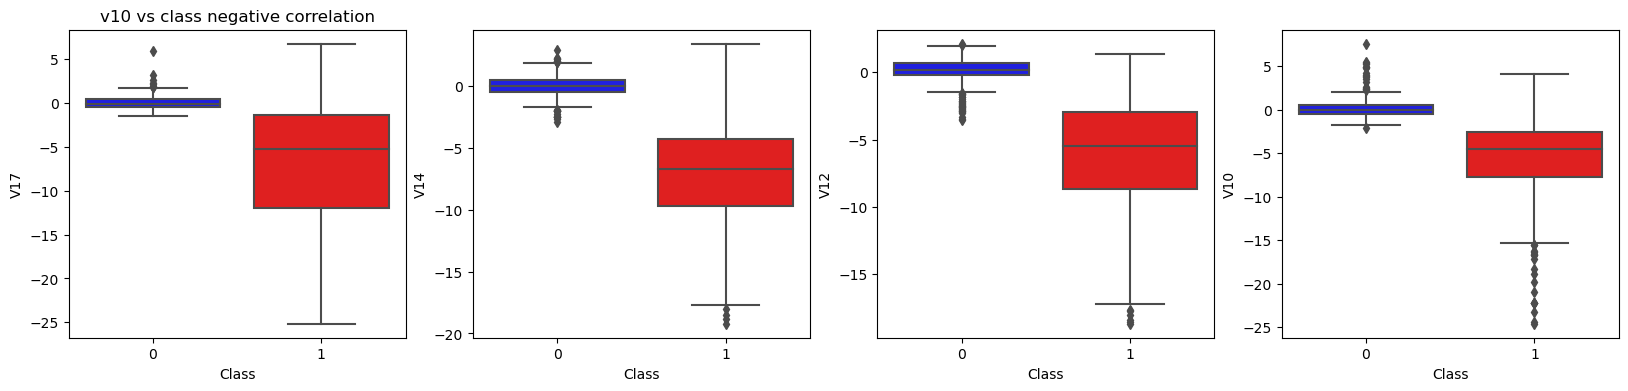

In [23]:
f, axes = plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x = "Class",y="V17",data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('v17 vs class negative correlation')

sns.boxplot(x = "Class",y="V14",data=new_df,palette=colors,ax=axes[1])
axes[0].set_title('v14 vs class negative correlation')

sns.boxplot(x = "Class",y="V12",data=new_df,palette=colors,ax=axes[2])
axes[0].set_title('v12 vs class negative correlation')

sns.boxplot(x = "Class",y="V10",data=new_df,palette=colors,ax=axes[3])
axes[0].set_title('v10 vs class negative correlation')

the above features of the new_df subplot are -ve correlated.

Text(0.5, 1.0, 'v19 vs class positive correlation')

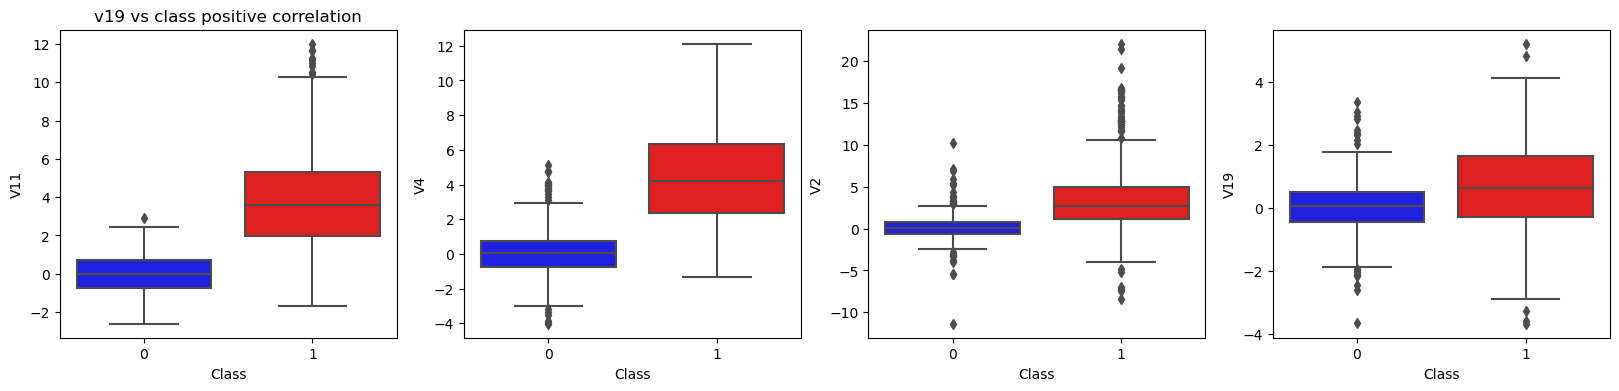

In [24]:
f, axes = plt.subplots(ncols=4,figsize=(20,4))
sns.boxplot(x="Class",y="V11",data=new_df,palette=colors,ax=axes[0])
axes[0].set_title("v11 vs class positive correlation")

sns.boxplot(x="Class",y="V4",data=new_df,palette=colors,ax=axes[1])
axes[0].set_title("v4 vs class positive correlation")

sns.boxplot(x="Class",y="V2",data=new_df,palette=colors,ax=axes[2])
axes[0].set_title("v2 vs class positive correlation")

sns.boxplot(x="Class",y="V19",data=new_df,palette=colors,ax=axes[3])
axes[0].set_title("v19 vs class positive correlation")

Anomaly detection.

First let's visualize the distributions

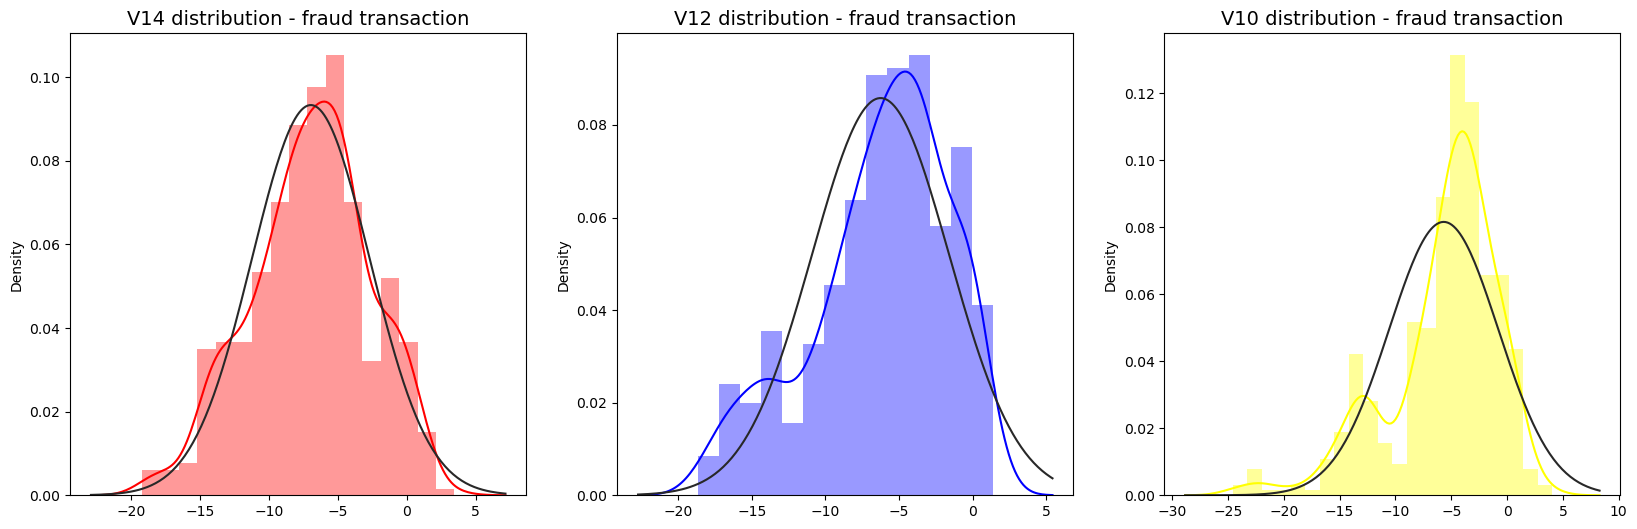

In [25]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values  # only v14 is the normal distribution.
sns.distplot(v14_fraud_dist,ax=ax1,fit=norm,color='red')
ax1.set_title('V14 distribution - fraud transaction',fontsize=14)

v14_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist,ax=ax2,fit=norm,color='blue')
ax2.set_title('V12 distribution - fraud transaction',fontsize=14)

v14_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist,ax=ax3,fit=norm,color='yellow')
ax3.set_title('V10 distribution - fraud transaction',fontsize=14)

plt.show()

v14 - removing outliers

In [26]:
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
print('quartile 25: {} | quartile 75 : {}'.format(q25,q75))

v14_iqr = q75-q25

print('iqr : {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5 
v14_lower,v14_upper = q25 - v14_cut_off,q75 + v14_cut_off

print('cut off: {}'.format(v14_cut_off))
print('v14_lower: {}'.format(v14_lower))
print('v14_upper : {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('feature v14 outliers for fraud cases: {}'.format(len(outliers)))
print('v14 outliers: {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

quartile 25: -9.692722964972386 | quartile 75 : -4.282820849486865
iqr : 5.409902115485521
cut off: 8.114853173228282
v14_lower: -17.807576138200666
v14_upper : 3.8320323237414167
feature v14 outliers for fraud cases: 4
v14 outliers: [-18.4937733551053, -18.8220867423816, -18.0499976898594, -19.2143254902614]


v12 removing outliers

In [27]:
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.4311310279993, -18.6837146333443, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976


v10 removing outliers

In [28]:
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.5637913387301, -18.9132433348732, -15.2399619587112, -15.3460988468775, -15.5637913387301, -22.1870885620007, -22.1870885620007, -24.4031849699728, -18.2711681738888, -22.1870885620007, -14.9246547735487, -15.2318333653018, -20.9491915543611, -23.2282548357516, -15.1241628144947, -16.2556117491401, -15.1237521803455, -17.1415136412892, -16.7460441053944, -16.6496281595399, -16.3035376590131, -22.1870885620007, -14.9246547735487, -16.6011969664137, -24.5882624372475, -15.2399619587112, -19.836148851696]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 944


Now boxplot after reduction of outliers

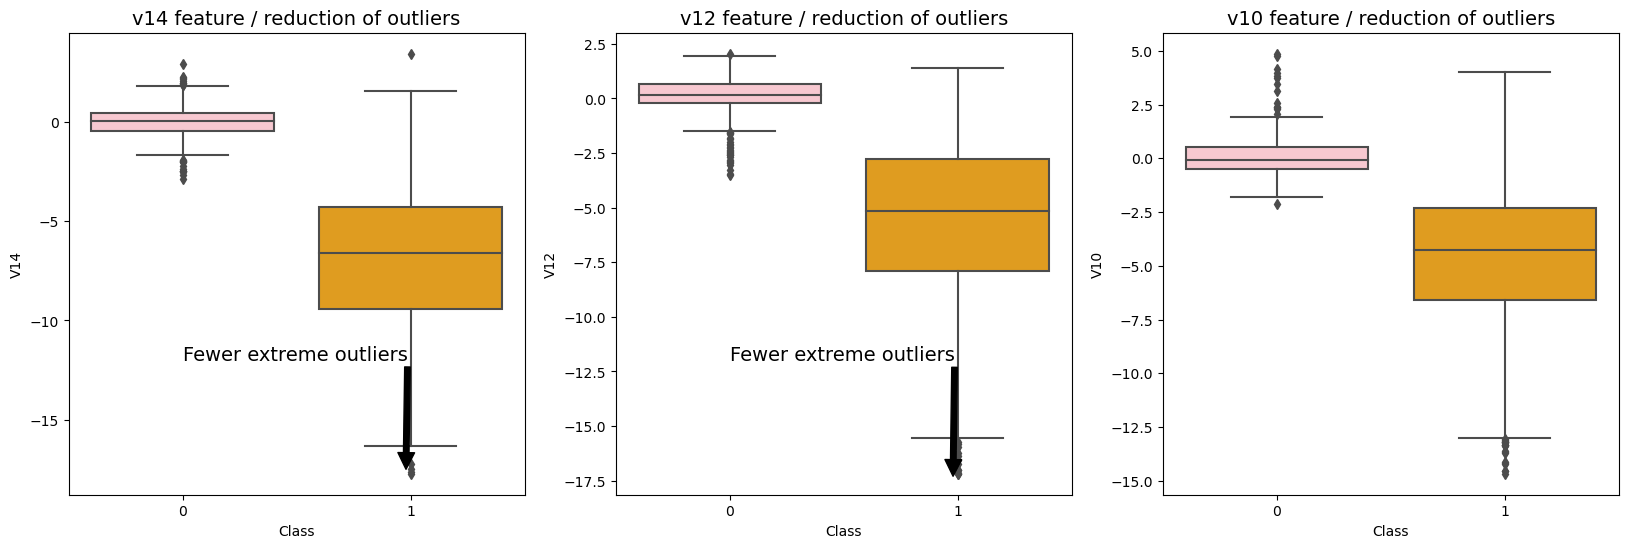

In [29]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
colors=['pink','orange']
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax1,palette=colors)
ax1.set_title('v14 feature / reduction of outliers',fontsize=14)
ax1.annotate('Fewer extreme outliers',xy=(0.98,-17.5),xytext=(0,-12),arrowprops=dict(facecolor='black'),fontsize=14)

sns.boxplot(x='Class',y='V12',data=new_df,ax=ax2,palette=colors)
ax2.set_title('v12 feature / reduction of outliers',fontsize=14)
ax2.annotate('Fewer extreme outliers',xy=(0.98,-17.3),xytext=(0,-12),arrowprops=dict(facecolor='black'),fontsize=14)

sns.boxplot(x='Class',y='V10',data=new_df,ax=ax3,palette=colors)
ax3.set_title('v10 feature / reduction of outliers',fontsize=14)
ax3.annotate('Fewer extreme outliers',xy=(0.95,-16.5),xytext=(0,-12),arrowprops=dict(facecolor='black'),fontsize=14)

plt.show()

Dimensionality reduction and clustering.

In [30]:
x = new_df.drop('Class',axis=1)
y = new_df['Class']

# t-SNE implementation.
t0 = time.time()
x_reduced_tsne = TSNE(n_components=2,random_state=42).fit_transform(x.values)
t1 = time.time()
print("TSNE took {:.2}s".format(t1-t0))

# PCA implementation
t0 = time.time()
x_reduced_pca = PCA(n_components=2,random_state=42).fit_transform(x.values)
t1 = time.time()
print("PCA took {:.2}s".format(t1-t0))

#TruncatedSVD
t0 = time.time()
x_reduced_svd = TruncatedSVD(n_components=2,random_state=42).fit_transform(x.values)
t1 = time.time()
print("TruncatedSVD took {:.2}s".format(t1-t0))

TSNE took 6.7s
PCA took 0.013s
TruncatedSVD took 0.0063s


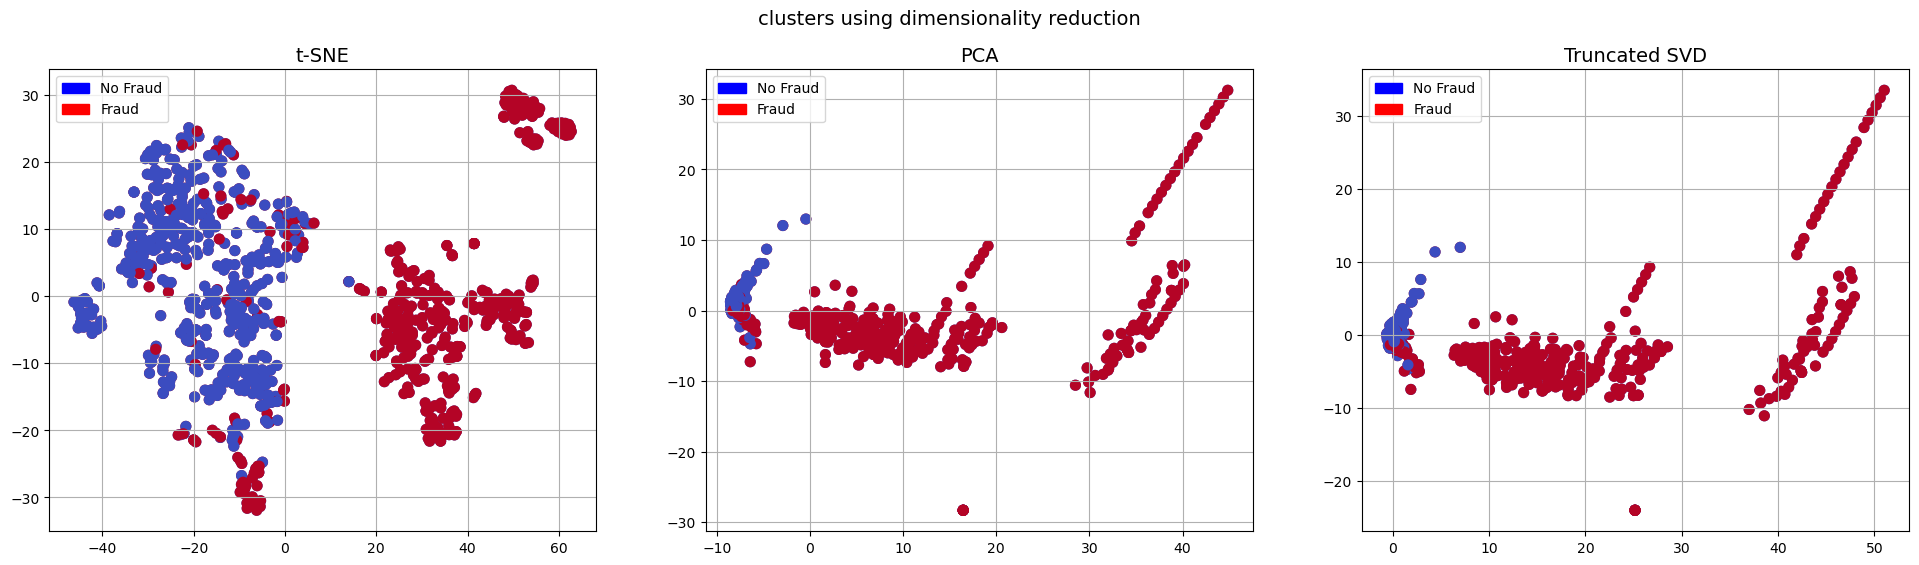

In [31]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,6))
f.suptitle("clusters using dimensionality reduction",fontsize=14)

blue_patch = mpatches.Patch(color='blue',label='No Fraud')
red_patch = mpatches.Patch(color='red',label='Fraud')

# t-SNE scatter plot
ax1.scatter(x_reduced_tsne[:,0],x_reduced_tsne[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax1.scatter(x_reduced_tsne[:,0],x_reduced_tsne[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax1.set_title("t-SNE",fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch,red_patch])

# pca scatter plot
ax2.scatter(x_reduced_pca[:,0],x_reduced_pca[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax2.scatter(x_reduced_pca[:,0],x_reduced_pca[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax2.set_title("PCA",fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch,red_patch])

#TruncatedSVD plot
ax3.scatter(x_reduced_svd[:,0],x_reduced_svd[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax3.scatter(x_reduced_svd[:,0],x_reduced_svd[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax3.set_title("Truncated SVD",fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch,red_patch])

plt.show()

In this project, we will train four types of classifiers.

In [32]:
x = new_df.drop('Class',axis=1)
y = new_df['Class']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
# turn the values into array
x_train = x_train.values 
x_test = x_test.values 
y_train = y_train.values 
y_test = y_test.values 

In [35]:
# now let's implement the classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [36]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    training_score = cross_val_score(classifier,x_train,y_train,cv=5)
    print("Classifiers: ",classifier.__class__.__name__,"has a training score of",round(training_score.mean(),2)*100,"% accuracy score")

Classifiers:  LogisticRegression has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 92.0 % accuracy score
Classifiers:  SVC has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 88.0 % accuracy score


In [40]:
# use gridsearchcv to find the best parameters
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty":['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(x_train,y_train)

log_reg = grid_log_reg.best_estimator_
knears_params = {"n_neighbors": list(range(2,5,1)),'algorithm' : ['auto','ball_tree','kd_tree','brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(x_train,y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [41]:
# overfitting case
log_reg_score = cross_val_score(log_reg,x_train,y_train,cv=5)
print("logistic regression validation score: ",round(log_reg_score.mean()*100,2).astype(str)+'%')

knears_score = cross_val_score(knears_neighbors,x_train,y_train,cv=5)
print("Knears Neighbors cross validation score: ",round(knears_score.mean()*100,2).astype(str)+'%')

svc_score = cross_val_score(svc,x_train,y_train,cv=5)
print("Support Vector Classifier validation score: ",round(svc_score.mean()*100,2).astype(str)+'%')

tree_score = cross_val_score(tree_clf,x_train,y_train,cv=5)
print("DecisionTree Classifier validation score: ",round(tree_score.mean()*100,2).astype(str)+'%')

logistic regression validation score:  93.25%
Knears Neighbors cross validation score:  92.98%
Support Vector Classifier validation score:  92.72%
DecisionTree Classifier validation score:  91.66%


In [46]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in ss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in ss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56958  56959  56960 ... 284804 284805 284806] Test: [    0     1     2 ... 57652 58187 58666]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56958  56959  56960 ... 115986 116813 117933]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113914 113915 113916 ... 170893 170894 170895]
Train: [     0      1      2 ... 284804 284805 284806] Test: [165919 166357 166374 ... 227855 227856 227857]
Train: [     0      1      2 ... 227855 227856 227857] Test: [221348 222833 224146 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


IndexError: index 227845 is out of bounds for axis 0 with size 227845

In [47]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, x, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

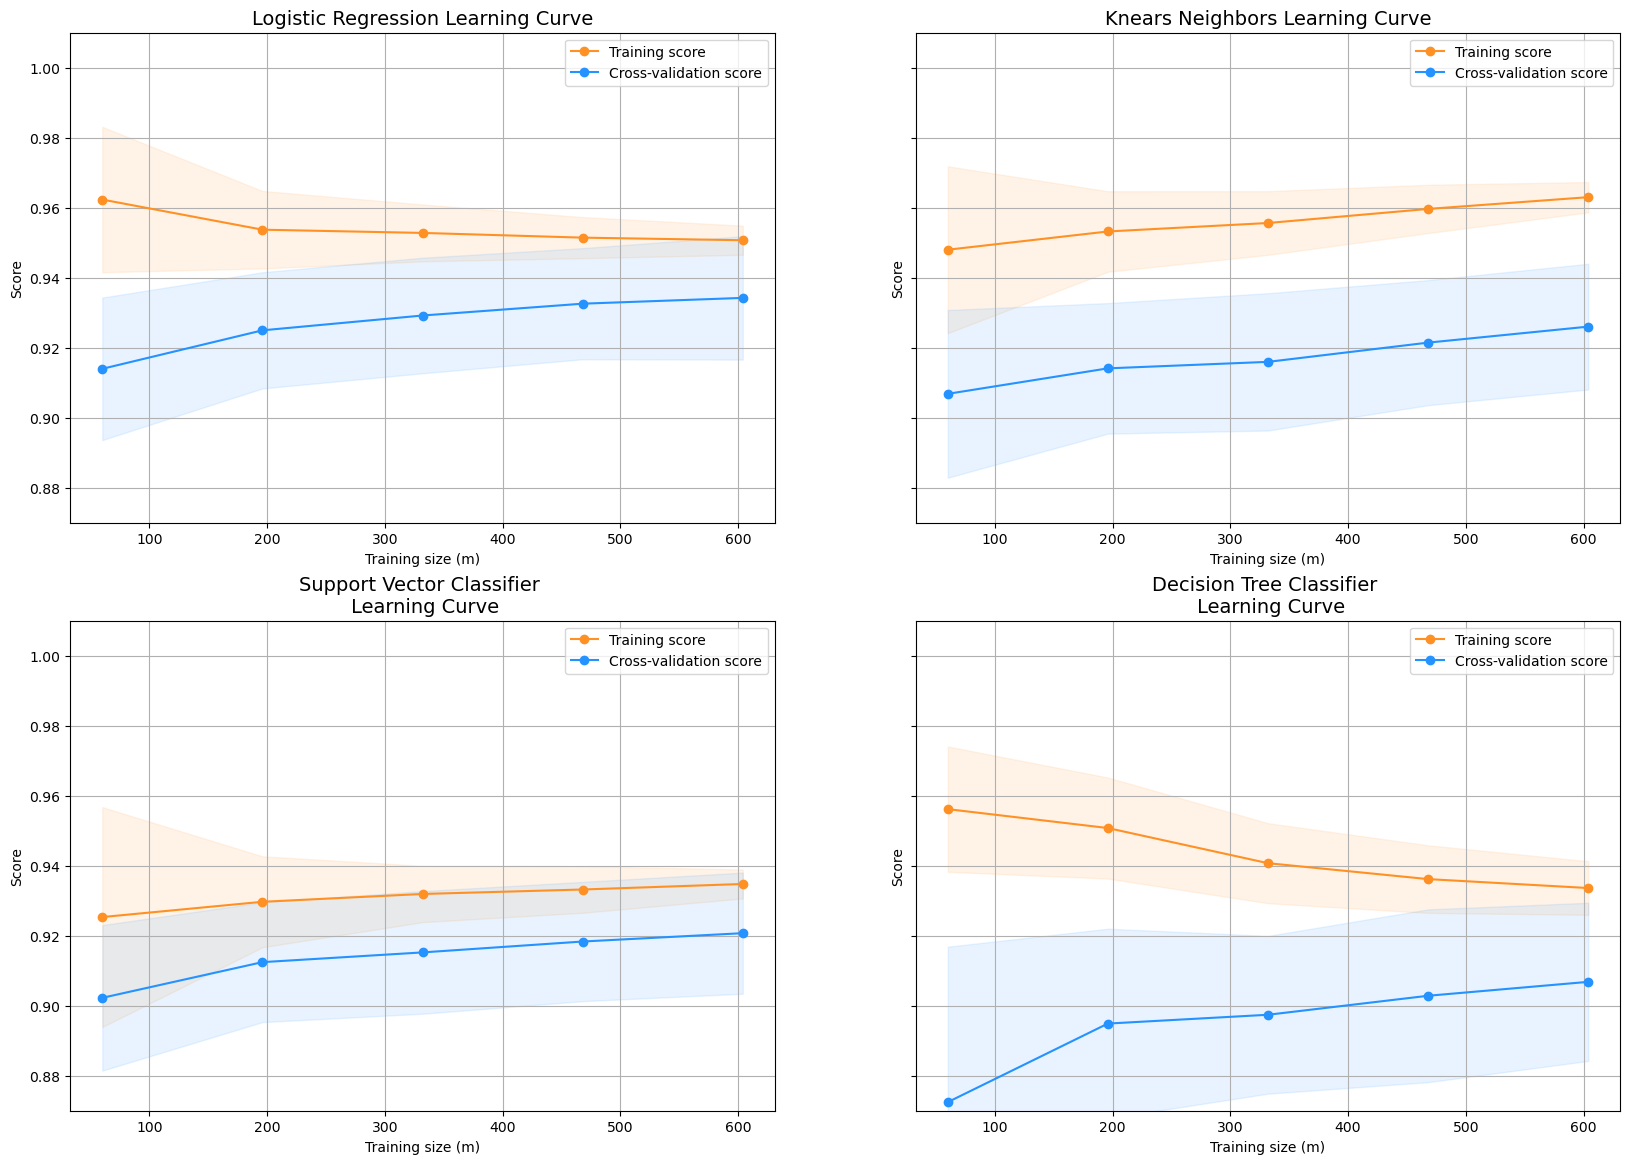

In [48]:
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=42)
plot_learning_curve(log_reg,knears_neighbors,svc,tree_clf,x_train,y_train,(0.87,1.01),cv=cv,n_jobs=4)

In the above subplots the wider the graph more is the overfitting in the dataset.

In [49]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# now we will create a dataframe with all the classifiers names and scores.
log_reg_pred = cross_val_predict(log_reg,x_train,y_train,cv=5,method="decision_function")

knears_pred = cross_val_predict(knears_neighbors,x_train,y_train,cv=5)

svc_pred = cross_val_predict(svc,x_train,y_train,cv=5,method="decision_function")

tree_pred = cross_val_predict(tree_clf,x_train,y_train,cv=5)

In [50]:
from sklearn.metrics import roc_auc_score

print("Logistic Regression : ",roc_auc_score(y_train,log_reg_pred))
print("KNears Neighbors : ",roc_auc_score(y_train,knears_pred))
print("Support Vector Classifier : ",roc_auc_score(y_train,svc_pred))
print("DecisionTree Classifier : ",roc_auc_score(y_train,tree_pred))

Logistic Regression :  0.9736424306287319
KNears Neighbors :  0.9283631893220935
Support Vector Classifier :  0.980070249385318
DecisionTree Classifier :  0.9158061116965226


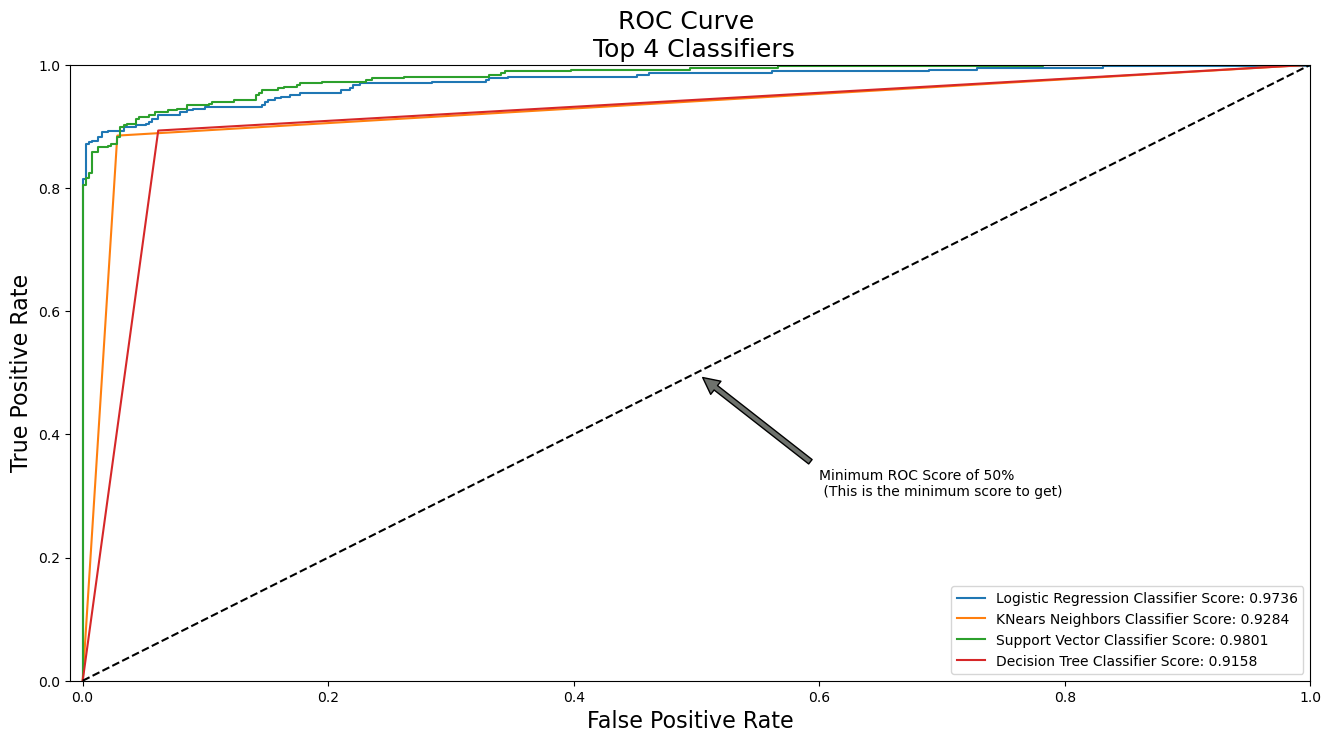

In [51]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

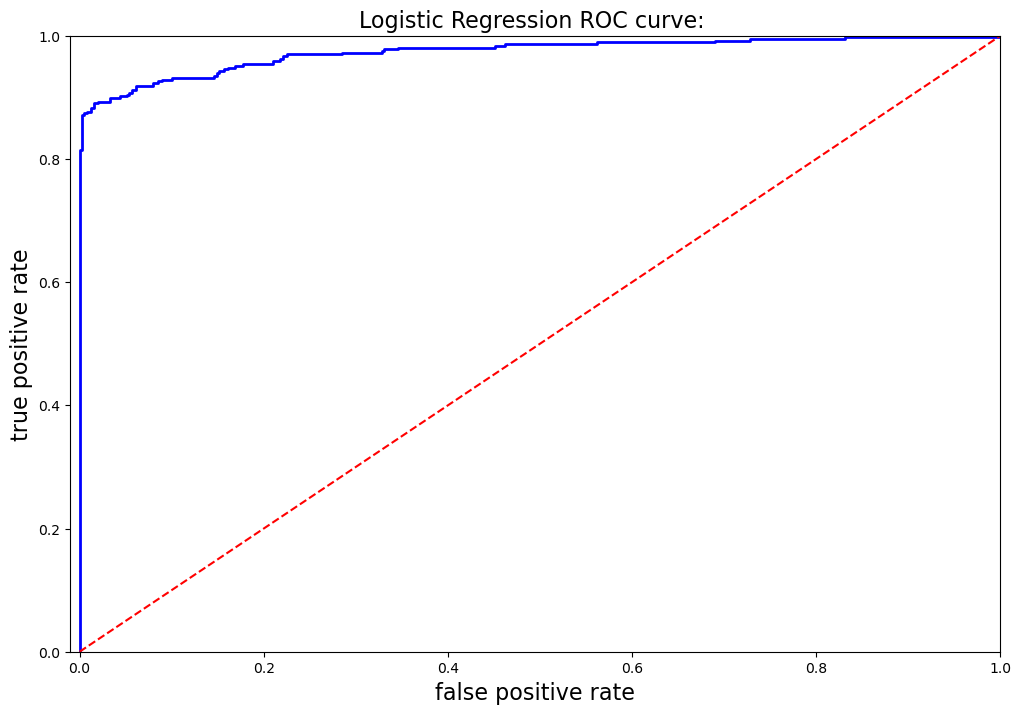

In [56]:
def logistic_roc_curve(log_fpr,log_tpr):
    plt.figure(figsize=(12,8))
    plt.title("Logistic Regression ROC curve: ",fontsize=16)
    plt.plot(log_fpr,log_tpr,'b-',linewidth=2)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('false positive rate',fontsize=16)
    plt.ylabel('true positive rate',fontsize=16)
    plt.axis([-0.01,1,0,1])
    
logistic_roc_curve(log_fpr,log_tpr)

plt.show()

In [58]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train,log_reg_pred)

In [59]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(x_train)

# overfitting case
print("overfitting \n")
print('recall score: {:.2f}'.format(recall_score(y_train,y_pred)))
print('precision score: {:.2f}'.format(precision_score(y_train,y_pred)))
print('F1 score: {:.2f}'.format(f1_score(y_train,y_pred)))
print('Accuracy score: {:.2f}'.format(accuracy_score(y_train,y_pred)))

overfitting 

recall score: 0.87
precision score: 0.86
F1 score: 0.87
Accuracy score: 0.87


In [61]:
undersample_y_score = log_reg.decision_function(original_xtest)

In [62]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest,undersample_y_score)

print('average-precision-recall score: {0:0.2f}'.format(undersample_average_precision))

average-precision-recall score: 0.09


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.09')

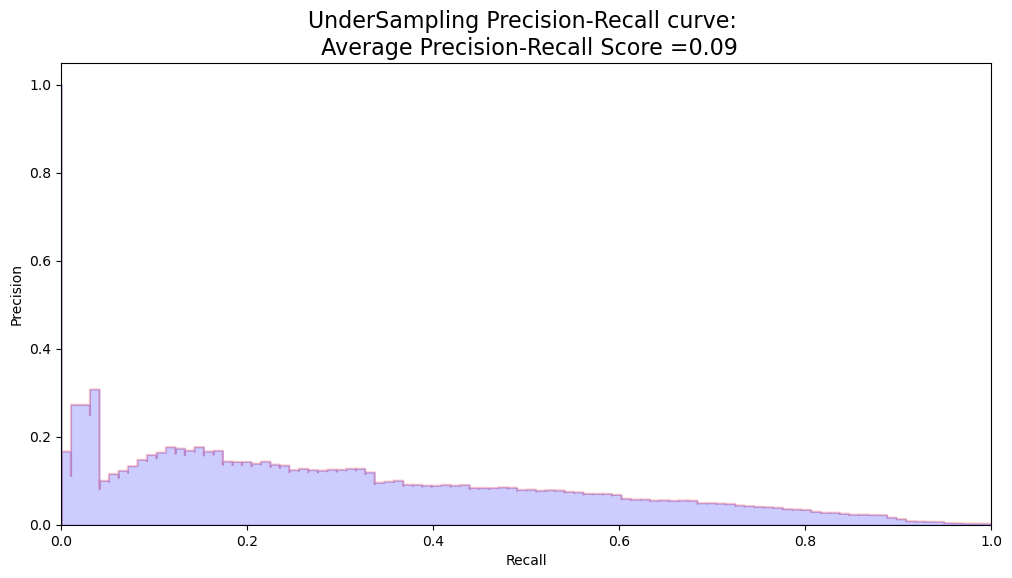

In [63]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest,undersample_y_score)
plt.step(recall, precision, color='red', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(undersample_average_precision), fontsize=16)

In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in ss.split(original_xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9755930566832716
precision: 0.061037663014663124
recall: 0.9086335605322947
f1: 0.11435577892508761
---------------------------------------------------------------------------------------------------------------------------------------


In [68]:
labels = ['Fraud','No Fraud']
smote_prediction = best_est.predict(original_xtest)
print(classification_report(original_ytest,smote_prediction,target_names=labels))

              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99     56864
    No Fraud       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [70]:
y_score = best_est.decision_function(original_xtest)

In [71]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.73


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.73')

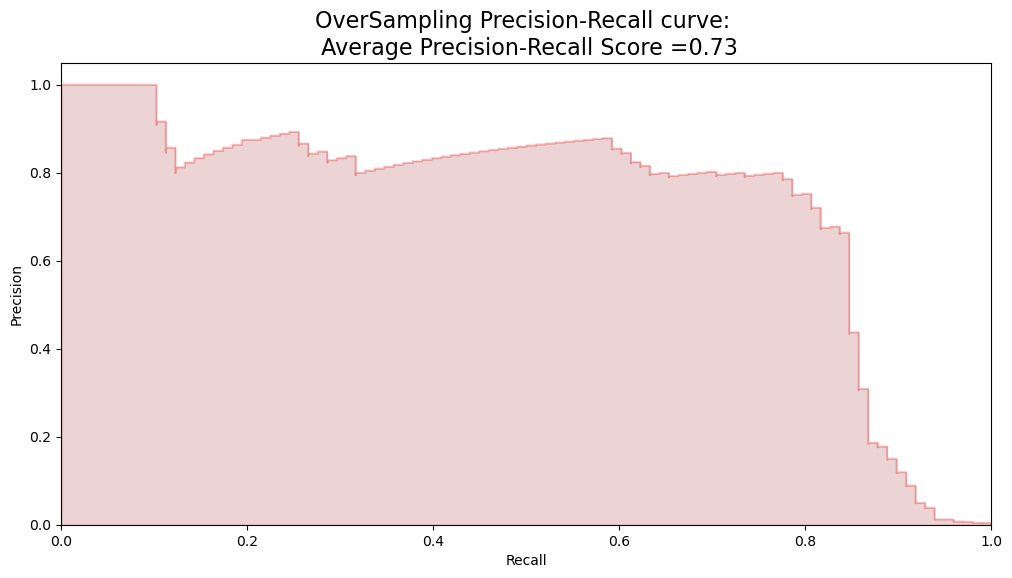

In [74]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='brown')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [76]:
# smote technique after splitting and cross validation
sm = SMOTE(sampling_strategy='minority',random_state=42)
xsm_train,ysm_train = sm.fit_resample(original_xtrain,original_ytrain)

In [77]:
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(xsm_train,ysm_train)
t1 = time.time()
print('fitting oversample data took {} sec'.format(t1-t0))

fitting oversample data took 6.4045727252960205 sec


 Now we will evaluate the performance of the classification model using confusion matrix in the random undersampling dataframe.

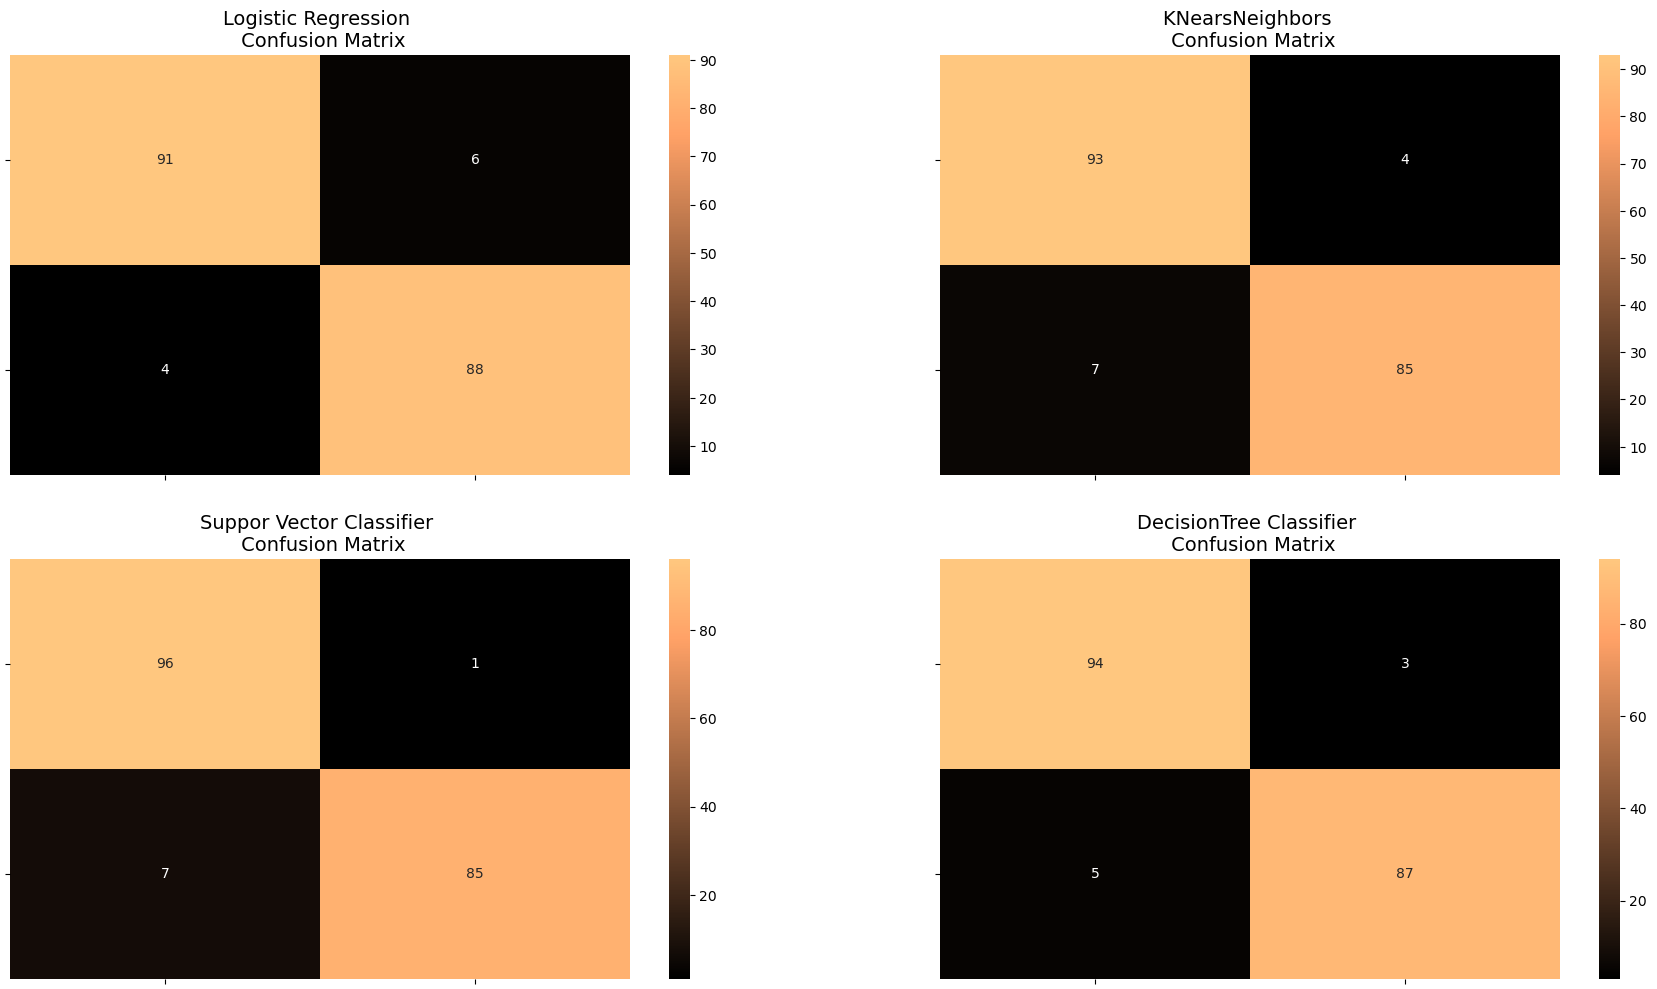

In [78]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg_sm.predict(x_test)
y_pred_knear = knears_neighbors.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_tree = tree_clf.predict(x_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

Now the classification report

In [79]:
from sklearn.metrics import classification_report

print('Logistic Regression')
print(classification_report(y_test,y_pred_log_reg))

print('KNearest Neighbors')
print(classification_report(y_test,y_pred_knear))

print('Support Vector Classifier')
print(classification_report(y_test,y_pred_svc))

print('Decision Tree Classifier')
print(classification_report(y_test,y_pred_tree))

Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        97
           1       0.94      0.96      0.95        92

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

KNearest Neighbors
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        97
           1       0.96      0.92      0.94        92

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.94      0.94      0.94       189

Support Vector Classifier
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        97
           1       0.99      0.92      0.96        92

    accuracy                           0.96       189
   macro avg       0.96      0.96      0.96       189
weighted 

final score test set in the logistic regression

In [80]:
from sklearn.metrics import accuracy_score

# logistic regression with undersampling
y_pred = log_reg.predict(x_test)
undersample_score = accuracy_score(y_test,y_pred)

# logistic regression with smote technique
y_pred_sm = best_est.predict(original_xtest)
oversample_score = accuracy_score(original_ytest,y_pred_sm)

d = {'Technique':['Random undersampling','Oversampling(SMOTE)'],'score':[undersample_score,oversample_score]}
final_df=pd.DataFrame(data=d)

score=final_df['score']
final_df.drop('score',axis=1,inplace=True)
final_df.insert(1,'score',score)

In [81]:
final_df

,Technique,score
0,Random undersampling,0.947090
1,Oversampling(SMOTE),0.975124


Now the main goal of this project is to implement simple neural network in both the undersampling dataframe and smote(oversampling) dataframe to see for which dataframe the classification model is working fine.

In [83]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = x_train.shape[1]

undersample_model = Sequential([Dense(n_inputs,input_shape=(n_inputs,),activation='relu'),Dense(32,activation='relu'),Dense(2,activation='softmax')])

In [84]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [86]:
undersample_model.compile(Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [87]:
undersample_model.fit(x_train,y_train,validation_split=0.2,batch_size=25,epochs=20,shuffle=True,verbose=2)

Epoch 1/20
25/25 - 4s - loss: 0.6395 - accuracy: 0.6159 - val_loss: 0.4740 - val_accuracy: 0.7616 - 4s/epoch - 178ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3946 - accuracy: 0.8394 - val_loss: 0.3631 - val_accuracy: 0.8543 - 101ms/epoch - 4ms/step
Epoch 3/20
25/25 - 0s - loss: 0.3108 - accuracy: 0.8924 - val_loss: 0.2998 - val_accuracy: 0.8940 - 104ms/epoch - 4ms/step
Epoch 4/20
25/25 - 0s - loss: 0.2618 - accuracy: 0.9189 - val_loss: 0.2502 - val_accuracy: 0.9205 - 104ms/epoch - 4ms/step
Epoch 5/20
25/25 - 0s - loss: 0.2280 - accuracy: 0.9222 - val_loss: 0.2175 - val_accuracy: 0.9272 - 103ms/epoch - 4ms/step
Epoch 6/20
25/25 - 0s - loss: 0.2028 - accuracy: 0.9272 - val_loss: 0.1916 - val_accuracy: 0.9404 - 96ms/epoch - 4ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1827 - accuracy: 0.9354 - val_loss: 0.1770 - val_accuracy: 0.9470 - 102ms/epoch - 4ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1674 - accuracy: 0.9404 - val_loss: 0.1630 - val_accuracy: 0.9470 - 100ms/epoch - 4ms/step
Epoch 9/20
25/25 -

In [88]:
undersample_predictions = undersample_model.predict(original_xtest, batch_size=200, verbose=0)

In [90]:
undersample_fraud_predictions = undersample_model.predict(original_xtest, batch_size=200, verbose=0)

In [94]:
n_inputs = xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [96]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
oversample_model.fit(xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
1214/1214 - 5s - loss: 0.0712 - accuracy: 0.9723 - val_loss: 0.0284 - val_accuracy: 0.9935 - 5s/epoch - 4ms/step
Epoch 2/20
1214/1214 - 3s - loss: 0.0162 - accuracy: 0.9964 - val_loss: 0.0074 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 3/20
1214/1214 - 3s - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0057 - val_accuracy: 0.9999 - 3s/epoch - 3ms/step
Epoch 4/20
1214/1214 - 3s - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9995 - 3s/epoch - 3ms/step
Epoch 5/20
1214/1214 - 3s - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0032 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 6/20
1214/1214 - 3s - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0019 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 7/20
1214/1214 - 3s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0019 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 8/20
1214/1214 - 3s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 9/

In [99]:
oversample_predictions = oversample_model.predict(original_xtest, batch_size=200, verbose=0)

In [101]:
oversample_fraud_predictions = oversample_model.predict(original_xtest, batch_size=200, verbose=0)

Therefore in our project the oversampling dataframe was more accurate than undersampling.